# Alunos

* Arthur Severo
* Victor Le Roy

# Clustering usando K-means

In [23]:
# IMPORTS

import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* **Exercicio 1:**

a. Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”, conforme Figura 1.

![imagem1](imgs/img_clustering_1.png)

In [24]:
# Obtendo os dados
data_path = "Data"
data_file = "data2.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = pd.DataFrame(mat["X"], columns=["X1", "X2"])

In [25]:
data

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


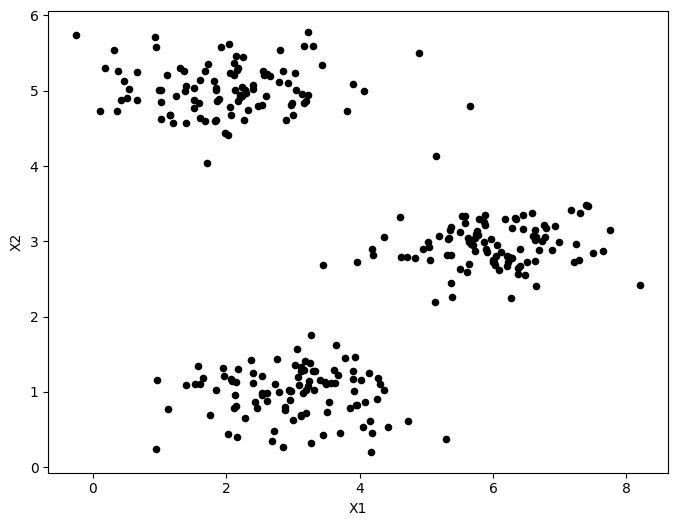

In [26]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], color="black", s=20)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [27]:
def k_means_plus(data, num_clusters, max_generations):
    # Inicializando os centroides
    centroids = np.zeros((num_clusters, data.shape[1]))
    centroids[0] = data[np.random.randint(0, data.shape[0])]
    for i in range(1, num_clusters):
        distances = np.zeros((data.shape[0], i))
        for j in range(i):
            distances[:, j] = np.linalg.norm(data - centroids[j], axis=1)
        min_distances = np.min(distances, axis=1)
        min_distances = min_distances / np.sum(min_distances)
        centroids[i] = data[np.random.choice(data.shape[0], p=min_distances)]
    
    # Executando o algoritmo
    for _ in range(max_generations):
        distances = np.zeros((data.shape[0], num_clusters))
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        for i in range(num_clusters):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    
    return centroids, clusters

In [28]:
def plot_k_means(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=100, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

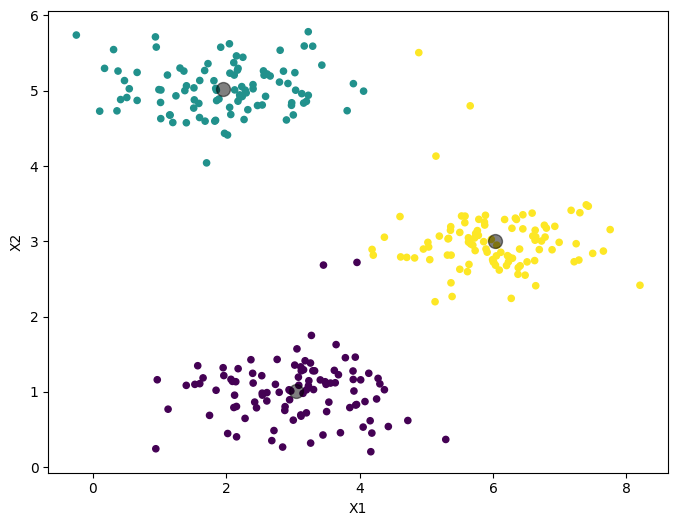

In [29]:
centroids, clusters = k_means_plus(data.values, 3, 100)
plot_k_means(data, clusters, centroids)